In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread("E:/murugesan/Downloads/4651155.jpg")
img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

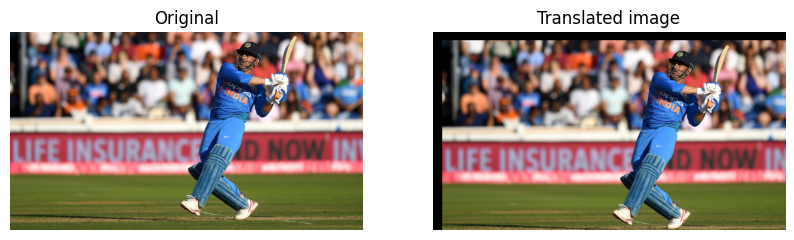

In [3]:
def translate_image(image,tx,ty):
    height, width, channels = image.shape
    translated_image = np.zeros_like(image)
    for y in range(height):
        for x in range(width):
            n_x=x+tx
            n_y=y+ty

            if 0 <= n_x < width and 0 <= n_y < height:
                translated_image[n_y, n_x] = image[y, x]
    
    return translated_image
    
tx, ty = 100,100

translated_image = translate_image(img_rgb, tx, ty)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')  

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Translated image")
plt.axis('off')  
plt.show()


In [4]:
images=cv.imread("E:/murugesan/Downloads/825918-sachin-tendulkar-wallpaper-by-theprabhjotsingh-download-on-zedge.jpg")
img_rgbs = cv.cvtColor(images, cv.COLOR_BGR2RGB)

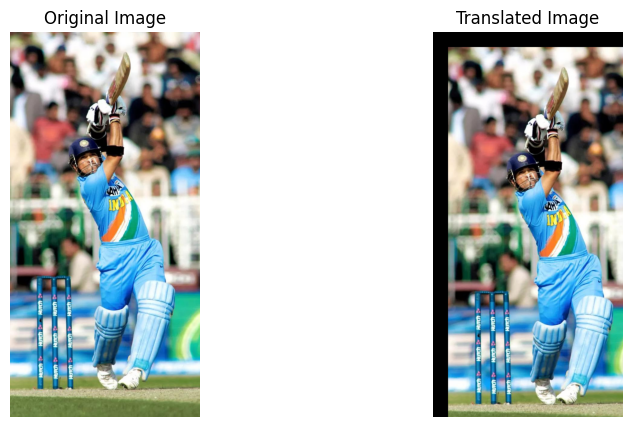

In [5]:
def translate_image(images,tx,ty):
    height, width, channels = images.shape
    translated_image = np.zeros_like(images)
    for y in range(height):
        for x in range(width):
            n_x=x+tx
            n_y=y+ty

            if 0 <= n_x < width and 0 <= n_y < height:
                translated_image[n_y, n_x] = images[y, x]
    
    return translated_image
    
tx, ty = 50,50

translated_image = translate_image(img_rgbs, tx, ty)
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgbs)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis('off')

plt.show()

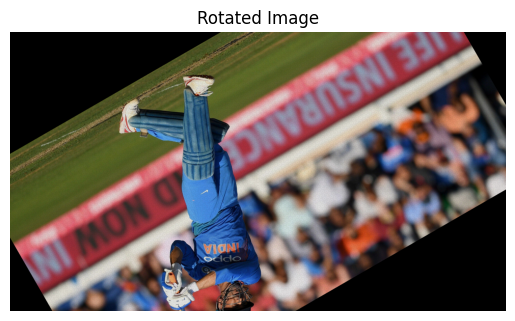

In [6]:
def rotate_image(image, angle):
    height, width, channels = image.shape
    translated_image = np.zeros_like(image) 

    angle_rad = np.deg2rad(angle)

    center_x, center_y = width // 2, height // 2

    for y in range(height):
        for x in range(width):
            shifted_x = x - center_x
            shifted_y = y - center_y

            new_x = int(shifted_x * np.cos(angle_rad) - shifted_y * np.sin(angle_rad)) + center_x
            new_y = int(shifted_x * np.sin(angle_rad) + shifted_y * np.cos(angle_rad)) + center_y

            if 0 <= new_x < width and 0 <= new_y < height:
                translated_image[new_y, new_x] = image[y, x]

    return translated_image


angle =150

rotated_image = rotate_image(img_rgb, angle)

plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')  
plt.show()

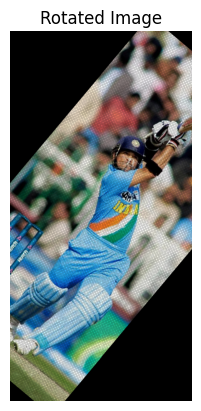

In [7]:
def rotate_image(images, angle):
    height, width, channels = images.shape
    translated_image = np.zeros_like(images) 

    angle_rad = np.deg2rad(angle)

    center_x, center_y = width // 2, height // 2

    for y in range(height):
        for x in range(width):
            shifted_x = x - center_x
            shifted_y = y - center_y

            new_x = int(shifted_x * np.cos(angle_rad) - shifted_y * np.sin(angle_rad)) + center_x
            new_y = int(shifted_x * np.sin(angle_rad) + shifted_y * np.cos(angle_rad)) + center_y

            if 0 <= new_x < width and 0 <= new_y < height:
                translated_image[new_y, new_x] = images[y, x]

    return translated_image

angle =40

rotated_image = rotate_image(img_rgbs, angle)

plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')  
plt.show()

(3240, 5760, 3)
(2160, 3840, 3)


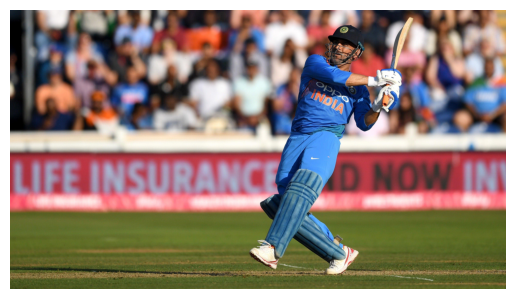

In [8]:
def scale_image(image, sx, sy):
    height, width, channels = image.shape
    new_width = int(width * sx)
    new_height = int(height * sy)
    
    scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            orig_x = int(x / sx)
            orig_y = int(y / sy)
            
            if orig_x < width and orig_y < height:
               scaled_image[y, x] = image[orig_y, orig_x]

    return scaled_image

sx, sy = 1.5, 1.5

scaled_image = scale_image(img_rgb, sx, sy)

plt.imshow(scaled_image)
plt.axis('off')  
print(scaled_image.shape)
print(img_rgb.shape)

(1920, 945, 3)
(2160, 3840, 3)


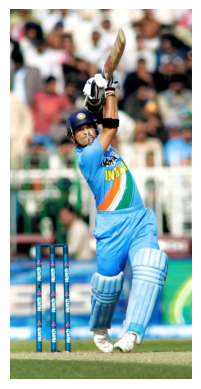

In [9]:
 def scale_image(images, sx, sy):
    height, width, channels = images.shape
    new_width = int(width * sx)
    new_height = int(height * sy)
    
    scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            orig_x = int(x / sx)
            orig_y = int(y / sy)
            
            if orig_x < width and orig_y < height:
               scaled_image[y, x] = images[orig_y, orig_x]

    return scaled_image

sx, sy = 1.5, 1.5

scaled_image = scale_image(img_rgbs, sx, sy)

plt.imshow(scaled_image)
plt.axis('off')
print(scaled_image.shape)
print(img_rgb.shape)

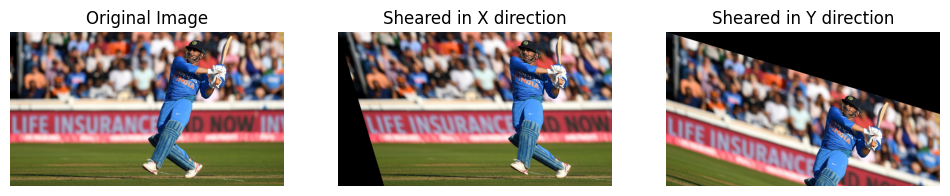

In [16]:
def shear_image(image, sh_x=0, sh_y=0):
    height, width = image.shape[:2]
    
    shear_matrix = np.array([
        [1, sh_x, 0],   
        [sh_y, 1, 0]    
     ], dtype=np.float32)
    
    sheared_img = cv.warpAffine(image, shear_matrix, (width, height))

    return sheared_img


sheared_x = shear_image(img_rgb, sh_x=0.3)   
sheared_y = shear_image(img_rgb, sh_y=0.3)  

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sheared_x)
plt.title("Sheared in X direction")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sheared_y)
plt.title("Sheared in Y direction")
plt.axis("off")

plt.show()


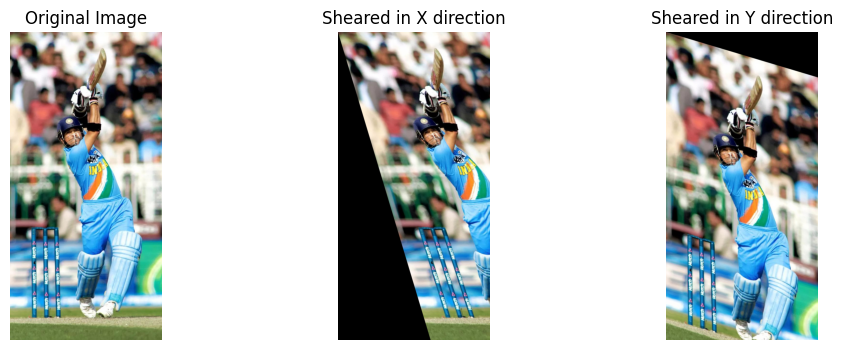

In [18]:
def shear_image(images, sh_x=0, sh_y=0):
    height, width = images.shape[:2]
    
    shear_matrix = np.array([
        [1, sh_x, 0],   
        [sh_y, 1, 0]    
     ], dtype=np.float32)
    
    sheared_img = cv.warpAffine(images, shear_matrix, (width, height))

    return sheared_img


sheared_x = shear_image(img_rgbs, sh_x=0.3)   
sheared_y = shear_image(img_rgbs, sh_y=0.3)  

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_rgbs)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sheared_x)
plt.title("Sheared in X direction")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sheared_y)
plt.title("Sheared in Y direction")
plt.axis("off")

plt.show()


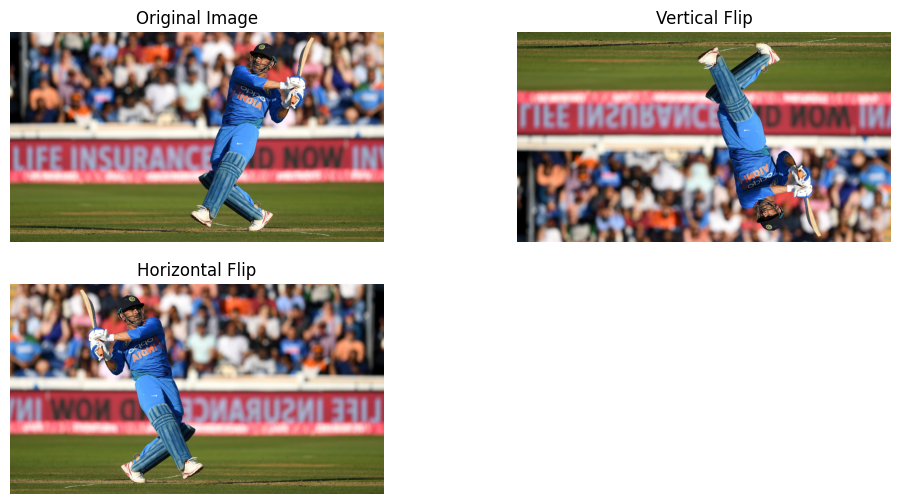

In [24]:
def manual_reflect(image, axis):
    if axis == 0:  # Vertical Flip
        return image[::-1]
    elif axis == 1:  # Horizontal Flip
        return image[ :,::-1 ]

manual_reflected_x = manual_reflect(img_rgb, 0)   
manual_reflected_y = manual_reflect(img_rgb, 1)  
 
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(manual_reflected_x)
plt.title("Vertical Flip")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(manual_reflected_y)
plt.title("Horizontal Flip")
plt.axis("off")
 
plt.show()

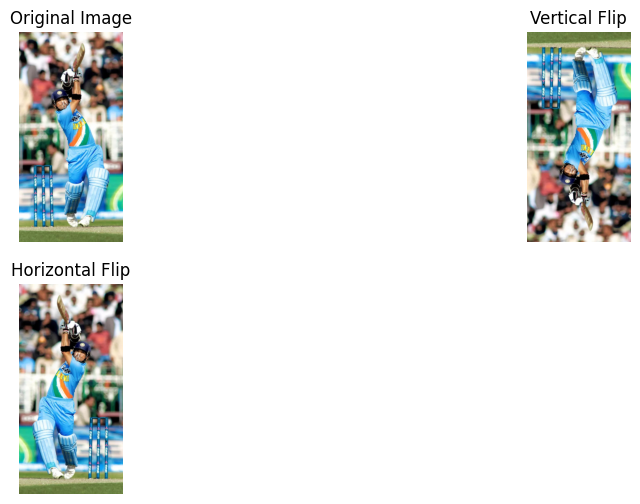

In [25]:
def manual_reflect(images, axis):
    if axis == 0:  # Vertical Flip
        return images[::-1]
    elif axis == 1:  # Horizontal Flip
        return images[ :,::-1 ]

manual_reflected_x = manual_reflect(img_rgbs, 0)   
manual_reflected_y = manual_reflect(img_rgbs, 1)  
 
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_rgbs)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(manual_reflected_x)
plt.title("Vertical Flip")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(manual_reflected_y)
plt.title("Horizontal Flip")
plt.axis("off")
 
plt.show()